# Transformations of Variables

(a)

$β_{1}$ represents how much the mean of the dependent variable blood pressure changes given a one unit increase in the independent variable age while holding other independent variables constant.

$β_{2}$ represents how much the mean of the dependent variable blood pressure changes given a one unit increase in the independent variable body mass index while holding other independent variables constant.

$β_{3}$ represents how much the mean of the dependent variable blood pressure changes given that someone is pregnant while holding other independent variables constant.

$β_{0}$ represents the expected mean value of the dependent variable blood pressure when someone is 0 years old, has a body mass index 0, and not pregnant. 

(b)

$β_{1}$ represents the average change of the dependent variable blood pressure  when age minus mean of the age increases by 1 unit while holding other independent variables constant, which is equivalent to the average change in blood pressure when the age increases by 1 unit. 

$β_{2}$ represents the average change of the dependent variable blood pressure  when BMI minus mean of the BMI increases by 1 unit while holding other independent variables constant, which is equivalent to the average change in blood pressure when the age increases by 1 unit. 

$β_{3}$ represents how much the mean of the dependent variable blood pressure changes given that someone is pregnant while holding other independent variables constant.

$β_{0}$ represents the expected mean value of the dependent variable blood pressure when someone has average age, average BMI, and not pregnant.
(c)

$β_{1}$ represents a change of 1 standard deviation in age is associated with a change of $β_{1}$ in blood pressure while holding other independent variables constant. 

$β_{2}$ represents a change of 1 standard deviation in BMI is associated with a change of $β_{2}$ in blood pressure while holding other independent variables constant. 

$β_{3}$ represents how much the mean of the dependent variable blood pressure changes given that someone is pregnant while holding other independent variables constant.

$β_{0}$ represents the expected mean value of the dependent variable blood pressure when someone has average age, average BMI, and not pregnant. 

(d)

Since $X_{3}$ is a dummy varibale, it only takes two values: either 1 when somebody is pregnant or 0 when somebody is not pregnant. It is meaningless to center it or standardize it. For numerical variables, we typically apply log transform or standardize it. For categorical variables, we typically apply one-hot encoding. 



# Simulation

(a)


Call:
lm(formula = y ~ x)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.5660 -2.3828 -0.1722  2.3689  8.5202 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   10.903      1.161   9.389 2.57e-15 ***
x             -0.187      0.381  -0.491    0.625    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.665 on 98 degrees of freedom
Multiple R-squared:  0.002453,	Adjusted R-squared:  -0.007726 
F-statistic: 0.241 on 1 and 98 DF,  p-value: 0.6246


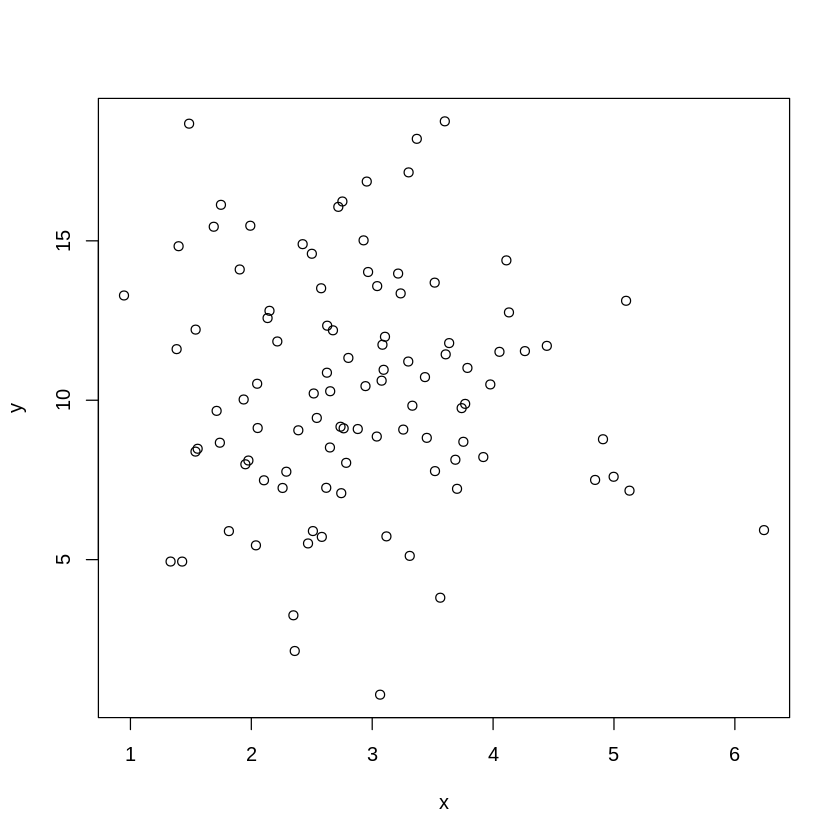

In [ ]:
set.seed(123)
y = rnorm(100, 10, 4)
x = rnorm(100, 3, 1)
model = lm(y ~ x)
summary(model)
plot(x,y)

The p-value for the coefficient $β_{1}$ is 0.625, which is really large. We failt to reject the null hypothesis that $β_{1} = 0$. 

(b)

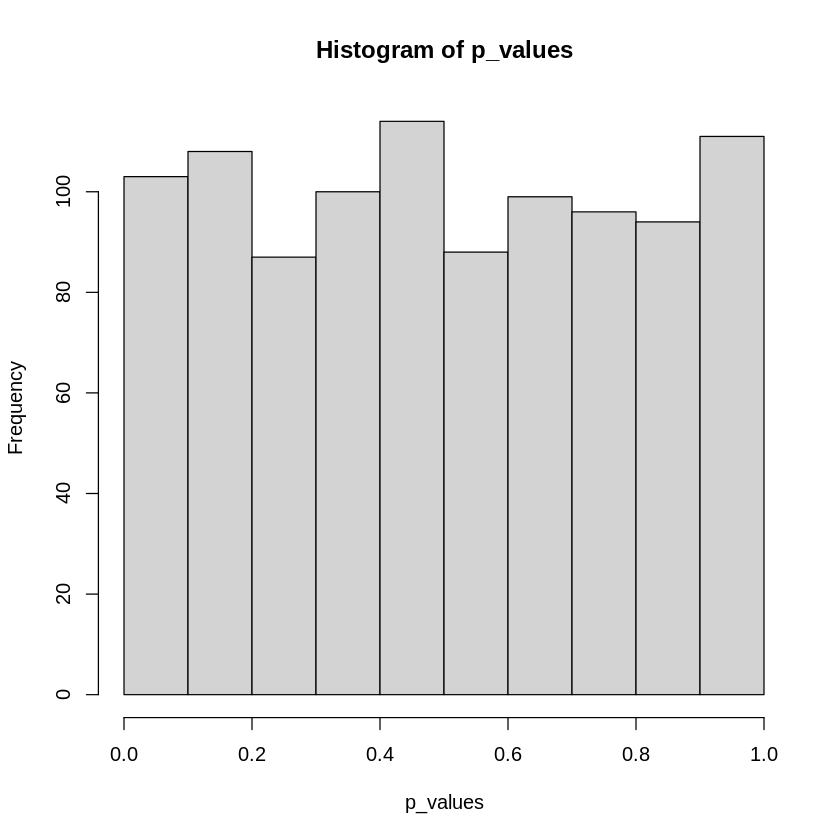

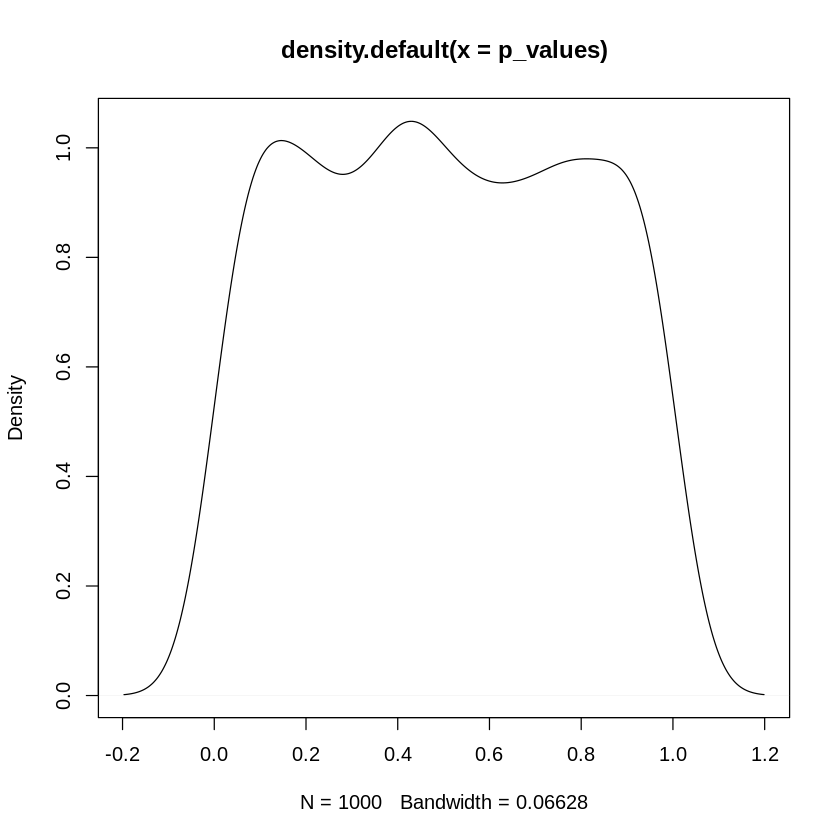

In [ ]:
set.seed(123)
p_values = vector()   # initialize an empty vector 
for (i in 1:1000){
  y = rnorm(100, 10, 4)
  x = rnorm(100, 3, 1)
  model = lm(y ~ x)
  p = summary(model)$coefficients[2,4]    # extract p_value for β1
  p_values = c(p_values, p)   # add each p_value to the vector 
}

hist(p_values)
plot(density(p_values))

Above graphs are the distribution of the p values. 

In [ ]:
sum(p_values < 0.05) / 1000

[1] 0.053

The proportion of times the p-value is less than 0.05 is 0.053. Only 5.3% of the time the estimated $β_{1}$ is significant means that y and x does not have a linear relationship. This result matches my intuition since there is no linear relationship between y and x. If we fix the type-I error rate ($α$) to be 5%, then there are around 5% of the time when the null hypothesis is true and we reject the null. Thus, we are simulating the type-I error rate here. 

(c)


Call:
lm(formula = y ~ x)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.9073 -0.6835 -0.0875  0.5806  3.2904 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  10.0546     0.3443  29.206  < 2e-16 ***
x             0.9475     0.1069   8.865  3.5e-14 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9707 on 98 degrees of freedom
Multiple R-squared:  0.4451,	Adjusted R-squared:  0.4394 
F-statistic:  78.6 on 1 and 98 DF,  p-value: 3.497e-14


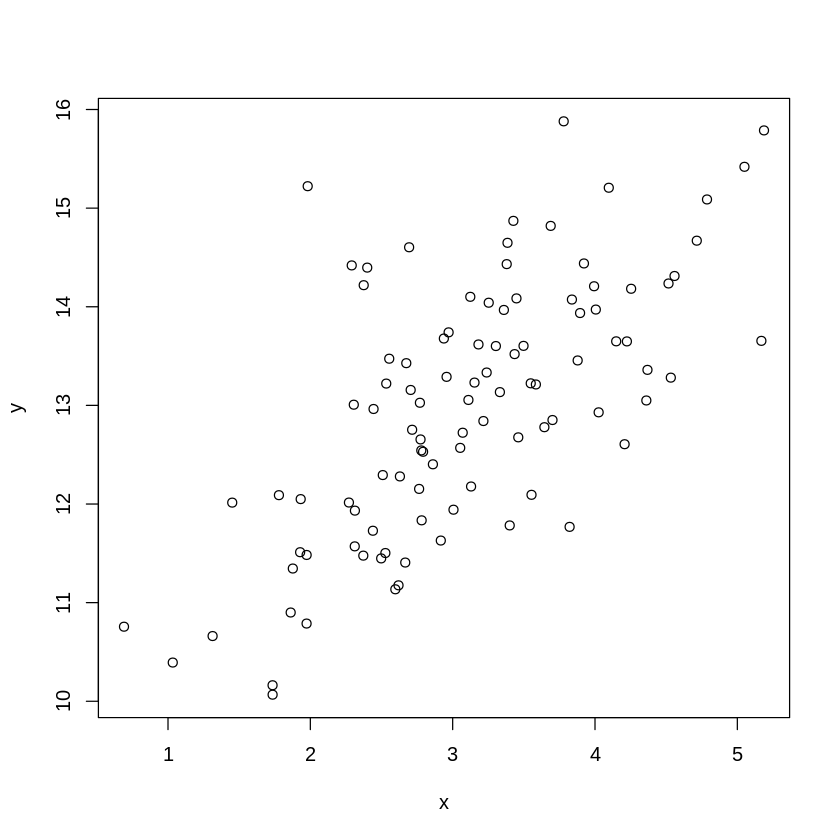

In [ ]:
set.seed(123)
x = rnorm(100, 3 ,1)
y = rnorm(100, 10+x, 1)
model = lm(y ~ x)
summary(model)
plot(x, y)

[1] 1

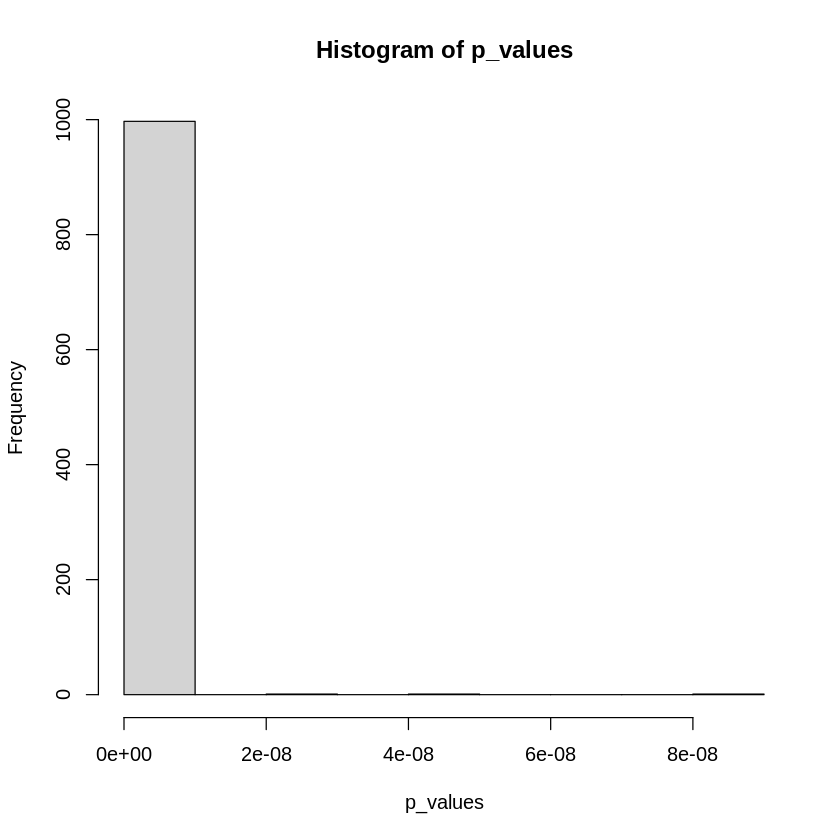

In [ ]:
set.seed(123)
p_values = vector()   # initialize an empty vector 
for (i in 1:1000){
  x = rnorm(100, 3 ,1)
  y = rnorm(100, 10+x, 1)
  model = lm(y ~ x)
  p = summary(model)$coefficients[2,4]    # extract p_value for β1
  p_values = c(p_values, p)   # add each p_value to the vector 
}

hist(p_values)
sum(p_values < 0.05) / 1000

The p value for $β_{1}$ is really small here and we can reject the null hypothesis. Now, we are simulating type-II error: when the alternative hypothesis is true and we fail to reject the null. The proportion of times the p value is less than 0.05 is 1 here means that we correctly reject the null hypothesis every time for the 1000 simulations. 

# Linear Regression Application

In [ ]:
install.packages("GGally")
install.packages("naniar")
library(GGally)
library(tidyverse)
library(ggplot2)
library(naniar)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
options(warn=-1)

In [ ]:
college = read.csv("college_scorecard.csv")
attach(college)
head(college)
names(college)

The following objects are masked from college (pos = 3):

    AANAPII, ACCREDAGENCY, ACTCMMID, ACTENMID, ACTMTMID, ACTWRMID,
    ADM_RATE, ANNHI, AVGFACSAL, C150_4, CCSIZSET, CCUGPROF, CITY,
    CONTROL, COSTT4_A, GRAD_DEBT_MDN, HBCU, HCM2, HIGHDEG, HSI,
    INEXPFTE, INSTNM, INSTURL, LOAN_EVER, MD_EARN_WNE_P10,
    MEDIAN_HH_INC, MENONLY, MN_EARN_WNE_P10, NANTI, NPCURL, NPT4_PRIV,
    NPT4_PUB, NUM4_PRIV, NUM4_PUB, OPEID, PAR_ED_PCT_1STGEN, PBI,
    PCIP01, PCIP03, PCIP04, PCIP05, PCIP09, PCIP10, PCIP11, PCIP12,
    PCIP13, PCIP14, PCIP15, PCIP16, PCIP19, PCIP22, PCIP23, PCIP24,
    PCIP25, PCIP26, PCIP27, PCIP29, PCIP30, PCIP31, PCIP38, PCIP39,
    PCIP40, PCIP41, PCIP42, PCIP43, PCIP44, PCIP45, PCIP46, PCIP47,
    PCIP48, PCIP49, PCIP50, PCIP51, PCIP52, PCIP54, PCTPELL, PELL_EVER,
    PFTFAC, POVERTY_RATE, PPTUG_EF, PREDDEG, REGION, RET_FT4, SAT_AVG,
    SATMTMID, SATVRMID, SATWRMID, SCH_DEG, STABBR, TRIBAL,
    TUITIONFEE_IN, TUITIONFEE_OUT, UNEMP_RATE, UNITID, WOMENONLY


The foll

,UNITID,OPEID,INSTNM,CITY,STABBR,ACCREDAGENCY,INSTURL,NPCURL,SCH_DEG,HCM2,⋯,RET_FT4,PAR_ED_PCT_1STGEN,GRAD_DEBT_MDN,LOAN_EVER,PELL_EVER,MEDIAN_HH_INC,POVERTY_RATE,UNEMP_RATE,MN_EARN_WNE_P10,MD_EARN_WNE_P10
,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,100654,100200,Alabama A & M University,Normal,AL,Southern Association of Colleges and Schools Commission on Colleges,www.aamu.edu/,www.aamu.edu/admissions-aid/tuition-fees/net-price-calculator.html,3,0,⋯,0.5689,0.3658280922,33375,0.8860640301,0.8527934714,49720.22,14.8800001144409,4.84000015258789,35500,31000
2,100663,105200,University of Alabama at Birmingham,Birmingham,AL,Southern Association of Colleges and Schools Commission on Colleges,https://www.uab.edu/,https://uab.studentaidcalculator.com/survey.aspx,3,0,⋯,0.831,0.341223671,22500,0.8574622694,0.6249301286,55735.22,10.9099998474121,3.45000004768371,48400,41200
3,100690,2503400,Amridge University,Montgomery,AL,Southern Association of Colleges and Schools Commission on Colleges,www.amridgeuniversity.edu/,www2.amridgeuniversity.edu:9091/,3,0,⋯,NULL,0.5125,27334,0.9560810811,0.8648648649,53683.7,10.6499996185302,3.59999990463256,47600,39600
4,100706,105500,University of Alabama in Huntsville,Huntsville,AL,Southern Association of Colleges and Schools Commission on Colleges,www.uah.edu/,finaid.uah.edu/,3,0,⋯,0.8291,0.3101321586,21607,0.8652155714,0.5571368774,58688.62,9.36999988555908,3.64000010490417,52000,46700
5,100724,100500,Alabama State University,Montgomery,AL,Southern Association of Colleges and Schools Commission on Colleges,www.alasu.edu/,www.alasu.edu/cost-aid/tuition-costs/net-price-calculator,3,0,⋯,0.6127,0.3434343434,32000,0.8889776358,0.874600639,46065.2,16.9599990844726,4.80999994277954,30600,27700
6,100751,105100,The University of Alabama,Tuscaloosa,AL,Southern Association of Colleges and Schools Commission on Colleges,www.ua.edu/,financialaid.ua.edu/net-price-calculator/,3,0,⋯,0.8693,0.2257126887,23250,0.9107411386,0.4526315789,57928.41,10.0500001907348,3.25999999046325,51600,44500


[1] "UNITID"            "OPEID"             "INSTNM"           
 [4] "CITY"              "STABBR"            "ACCREDAGENCY"     
 [7] "INSTURL"           "NPCURL"            "SCH_DEG"          
[10] "HCM2"              "PREDDEG"           "HIGHDEG"          
[13] "CONTROL"           "REGION"            "CCUGPROF"         
[16] "CCSIZSET"          "HBCU"              "PBI"              
[19] "ANNHI"             "TRIBAL"            "AANAPII"          
[22] "HSI"               "NANTI"             "MENONLY"          
[25] "WOMENONLY"         "ADM_RATE"          "SATVRMID"         
[28] "SATMTMID"          "SATWRMID"          "ACTCMMID"         
[31] "ACTENMID"          "ACTMTMID"          "ACTWRMID"         
[34] "SAT_AVG"           "PCIP01"            "PCIP03"           
[37] "PCIP04"            "PCIP05"            "PCIP09"           
[40] "PCIP10"            "PCIP11"            "PCIP12"           
[43] "PCIP13"            "PCIP14"            "PCIP15"           
[46] "PCIP16"            "PCIP19"            "PCIP22"           
[49] "PCIP23"            "PCIP24"            "PCIP25"           
[52] "PCIP26"            "PCIP27"            "PCIP29"           
[55] "PCIP30"            "PCIP31"            "PCIP38"           
[58] "PCIP39"            "PCIP40"            "PCIP41"           
[61] "PCIP42"            "PCIP43"            "PCIP44"           
[64] "PCIP45"            "PCIP46"            "PCIP47"           
[67] "PCIP48"            "PCIP49"            "PCIP50"           
[70] "PCIP51"            "PCIP52"            "PCIP54"           
[73] "PPTUG_EF"          "NPT4_PUB"          "NPT4_PRIV"        
[76] "NUM4_PUB"          "NUM4_PRIV"         "COSTT4_A"         
[79] "TUITIONFEE_IN"     "TUITIONFEE_OUT"    "INEXPFTE"         
[82] "AVGFACSAL"         "PFTFAC"            "PCTPELL"          
[85] "C150_4"            "RET_FT4"           "PAR_ED_PCT_1STGEN"
[88] "GRAD_DEBT_MDN"     "LOAN_EVER"         "PELL_EVER"        
[91] "MEDIAN_HH_INC"     "POVERTY_RATE"      "UNEMP_RATE"       
[94] "MN_EARN_WNE_P10"   "MD_EARN_WNE_P10"

In [ ]:
# drop useless columns 
college = college %>% select(-c(UNITID, OPEID, CITY, STABBR, ACCREDAGENCY, INSTURL, NPCURL, SCH_DEG, CCUGPROF, CCSIZSET))
head(college)

,INSTNM,HCM2,PREDDEG,HIGHDEG,CONTROL,REGION,HBCU,PBI,ANNHI,TRIBAL,⋯,RET_FT4,PAR_ED_PCT_1STGEN,GRAD_DEBT_MDN,LOAN_EVER,PELL_EVER,MEDIAN_HH_INC,POVERTY_RATE,UNEMP_RATE,MN_EARN_WNE_P10,MD_EARN_WNE_P10
,<chr>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,Alabama A & M University,0,3,4,1,5,1,0,0,0,⋯,0.5689,0.3658280922,33375,0.8860640301,0.8527934714,49720.22,14.8800001144409,4.84000015258789,35500,31000
2,University of Alabama at Birmingham,0,3,4,1,5,0,0,0,0,⋯,0.831,0.341223671,22500,0.8574622694,0.6249301286,55735.22,10.9099998474121,3.45000004768371,48400,41200
3,Amridge University,0,2,4,2,5,0,0,0,0,⋯,NULL,0.5125,27334,0.9560810811,0.8648648649,53683.7,10.6499996185302,3.59999990463256,47600,39600
4,University of Alabama in Huntsville,0,3,4,1,5,0,0,0,0,⋯,0.8291,0.3101321586,21607,0.8652155714,0.5571368774,58688.62,9.36999988555908,3.64000010490417,52000,46700
5,Alabama State University,0,3,4,1,5,1,0,0,0,⋯,0.6127,0.3434343434,32000,0.8889776358,0.874600639,46065.2,16.9599990844726,4.80999994277954,30600,27700
6,The University of Alabama,0,3,4,1,5,0,0,0,0,⋯,0.8693,0.2257126887,23250,0.9107411386,0.4526315789,57928.41,10.0500001907348,3.25999999046325,51600,44500


In [ ]:
# all rows, columns start from 16 to the end
# 2 means apply to columns 
# convert everything to numeric 
college[,16:ncol(college)] <- apply(college[,16:ncol(college)], 2, as.numeric)

# all rows, columns start from 2 to 15
# 2 means apply to columns
# convert everything to factor                                      
college[,2:15] <- apply(college[,2:15], 2, as.factor)

In [ ]:
# complete.cases(college$MD_EARN_WNE_P10) returns boolean statement 
# takes all rows that do not have missing values in MD_EARN_WNE_P10 and all columns
# 2 means apply to columns 
# calculating the proportion of missing data 

college = college[complete.cases(college$MD_EARN_WNE_P10),]
apply(college, 2,  function(x) sum(complete.cases(x))/nrow(college)) 

INSTNM              HCM2           PREDDEG           HIGHDEG 
       1.00000000        1.00000000        1.00000000        1.00000000 
          CONTROL            REGION              HBCU               PBI 
       1.00000000        1.00000000        1.00000000        1.00000000 
            ANNHI            TRIBAL           AANAPII               HSI 
       1.00000000        1.00000000        1.00000000        1.00000000 
            NANTI           MENONLY         WOMENONLY          ADM_RATE 
       1.00000000        1.00000000        1.00000000        0.36868144 
         SATVRMID          SATMTMID          SATWRMID          ACTCMMID 
       0.25209723        0.25209723        0.15143042        0.25984083 
         ACTENMID          ACTMTMID          ACTWRMID           SAT_AVG 
       0.24263282        0.24263282        0.06603571        0.26435793 
           PCIP01            PCIP03            PCIP04            PCIP05 
       0.93331899        0.93331899        0.93331899        0.93331899 
           PCIP09            PCIP10            PCIP11            PCIP12 
       0.93331899        0.93331899        0.93331899        0.93331899 
           PCIP13            PCIP14            PCIP15            PCIP16 
       0.93331899        0.93331899        0.93331899        0.93331899 
           PCIP19            PCIP22            PCIP23            PCIP24 
       0.93331899        0.93331899        0.93331899        0.93331899 
           PCIP25            PCIP26            PCIP27            PCIP29 
       0.93331899        0.93331899        0.93331899        0.93331899 
           PCIP30            PCIP31            PCIP38            PCIP39 
       0.93331899        0.93331899        0.93331899        0.93331899 
           PCIP40            PCIP41            PCIP42            PCIP43 
       0.93331899        0.93331899        0.93331899        0.93331899 
           PCIP44            PCIP45            PCIP46            PCIP47 
       0.93331899        0.93331899        0.93331899        0.93331899 
           PCIP48            PCIP49            PCIP50            PCIP51 
       0.93331899        0.93331899        0.93331899        0.93331899 
           PCIP52            PCIP54          PPTUG_EF          NPT4_PUB 
       0.93331899        0.93331899        0.92686599        0.36868144 
        NPT4_PRIV          NUM4_PUB         NUM4_PRIV          COSTT4_A 
       0.52419875        0.37298344        0.52505915        0.65132287 
    TUITIONFEE_IN    TUITIONFEE_OUT          INEXPFTE         AVGFACSAL 
       0.70488277        0.67412347        0.94665519        0.70187137 
           PFTFAC           PCTPELL            C150_4           RET_FT4 
       0.66659497        0.92794149        0.43858894        0.39707464 
PAR_ED_PCT_1STGEN     GRAD_DEBT_MDN         LOAN_EVER         PELL_EVER 
       0.94730049        0.88320069        0.85695849        0.88212519 
    MEDIAN_HH_INC      POVERTY_RATE        UNEMP_RATE   MN_EARN_WNE_P10 
       0.89072919        0.89072919        0.89072919        1.00000000 
  MD_EARN_WNE_P10 
       1.00000000

We can see that columns containing admission rate, SAT, and ACT have a large portion of the data missing, so we remove them from the dataset. 

In [ ]:
college = college %>% select(-c(ADM_RATE, SATVRMID, SATMTMID, SATWRMID, ACTCMMID, ACTENMID, ACTMTMID, ACTWRMID, SAT_AVG))
names(college)

[1] "INSTNM"            "HCM2"              "PREDDEG"          
 [4] "HIGHDEG"           "CONTROL"           "REGION"           
 [7] "HBCU"              "PBI"               "ANNHI"            
[10] "TRIBAL"            "AANAPII"           "HSI"              
[13] "NANTI"             "MENONLY"           "WOMENONLY"        
[16] "PCIP01"            "PCIP03"            "PCIP04"           
[19] "PCIP05"            "PCIP09"            "PCIP10"           
[22] "PCIP11"            "PCIP12"            "PCIP13"           
[25] "PCIP14"            "PCIP15"            "PCIP16"           
[28] "PCIP19"            "PCIP22"            "PCIP23"           
[31] "PCIP24"            "PCIP25"            "PCIP26"           
[34] "PCIP27"            "PCIP29"            "PCIP30"           
[37] "PCIP31"            "PCIP38"            "PCIP39"           
[40] "PCIP40"            "PCIP41"            "PCIP42"           
[43] "PCIP43"            "PCIP44"            "PCIP45"           
[46] "PCIP46"            "PCIP47"            "PCIP48"           
[49] "PCIP49"            "PCIP50"            "PCIP51"           
[52] "PCIP52"            "PCIP54"            "PPTUG_EF"         
[55] "NPT4_PUB"          "NPT4_PRIV"         "NUM4_PUB"         
[58] "NUM4_PRIV"         "COSTT4_A"          "TUITIONFEE_IN"    
[61] "TUITIONFEE_OUT"    "INEXPFTE"          "AVGFACSAL"        
[64] "PFTFAC"            "PCTPELL"           "C150_4"           
[67] "RET_FT4"           "PAR_ED_PCT_1STGEN" "GRAD_DEBT_MDN"    
[70] "LOAN_EVER"         "PELL_EVER"         "MEDIAN_HH_INC"    
[73] "POVERTY_RATE"      "UNEMP_RATE"        "MN_EARN_WNE_P10"  
[76] "MD_EARN_WNE_P10"

Then, we can combine columns NPT4_PUB and NPT4_PRIV, NUM4_PUB and NUM4_PRIV to a single column because they code public and private school separately. 


In [ ]:
# is.na(college_df$NPT4_PRIV) contains TRUE or FALSE values
# college_df$NPT4_PUB: what to return if test is TRUE
# college_df$NPT4_PRIVL: what to return if test is FALSE 

college$NPT <- ifelse(is.na(college$NPT4_PRIV), 
                         college$NPT4_PUB,
                         college$NPT4_PRIV)
college$NUM <- ifelse(is.na(college$NUM4_PRIV), 
                         college$NUM4_PUB,
                         college$NUM4_PRIV)

In [ ]:
y = college$MD_EARN_WNE_P10
college = college %>% select(-c(NPT4_PUB, NPT4_PRIV, NUM4_PUB, NUM4_PRIV))

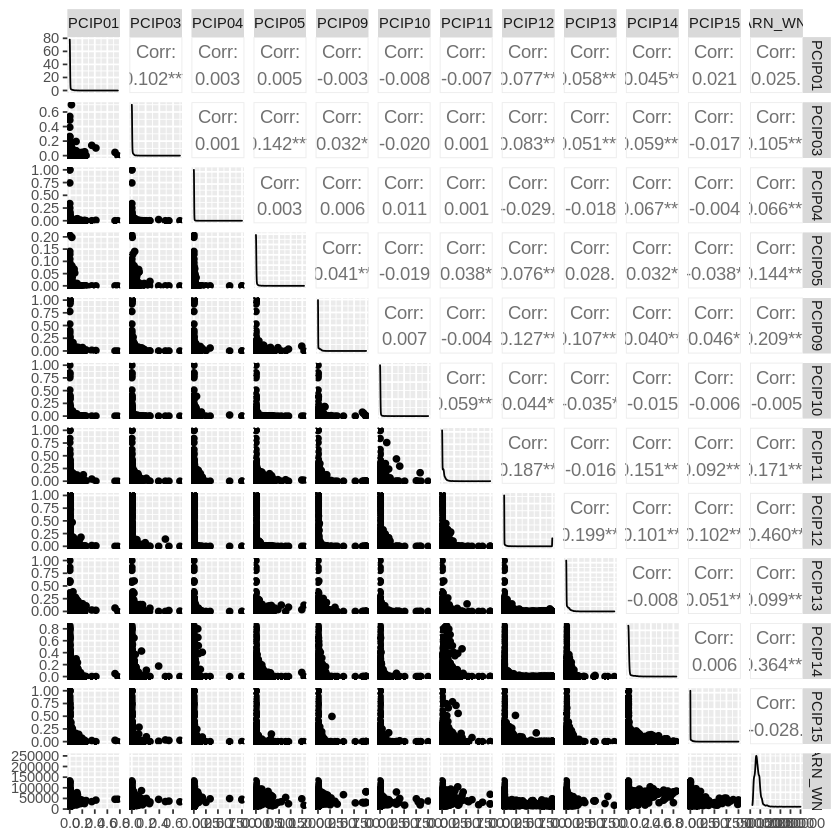

In [ ]:
ggpairs(college[,c(16:26, 72)])

From above scatterplot matrix, we can see that no variable has a relatively strong correlation with the target variable.

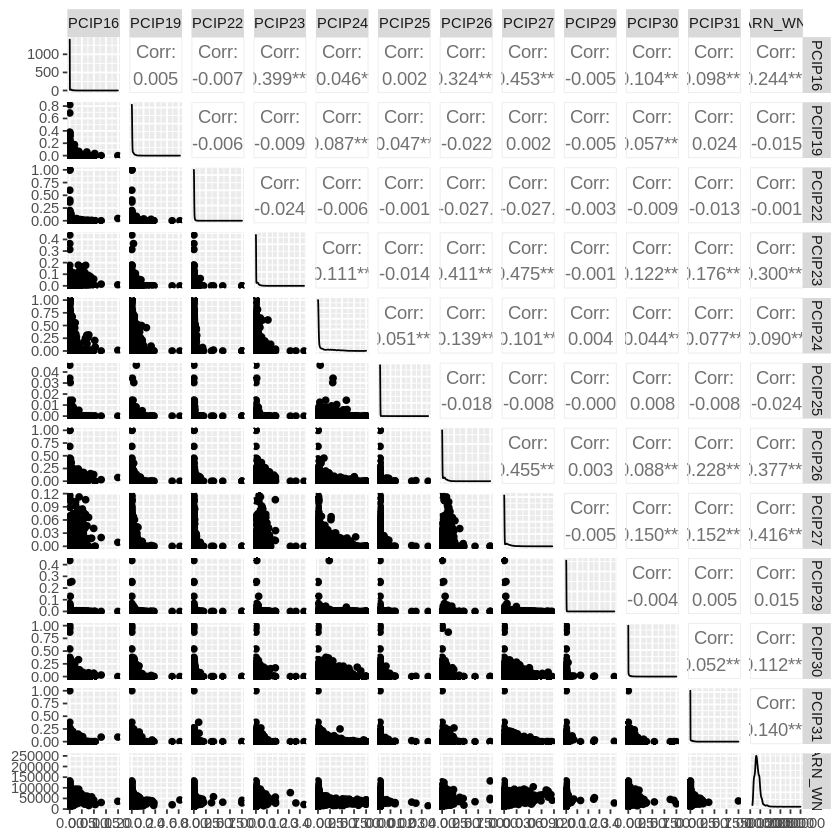

In [ ]:
ggpairs(college[,c(27:37, 72)])

From above scatterplot matrix, we can see that no variable has a relatively strong correlation with the target variable.

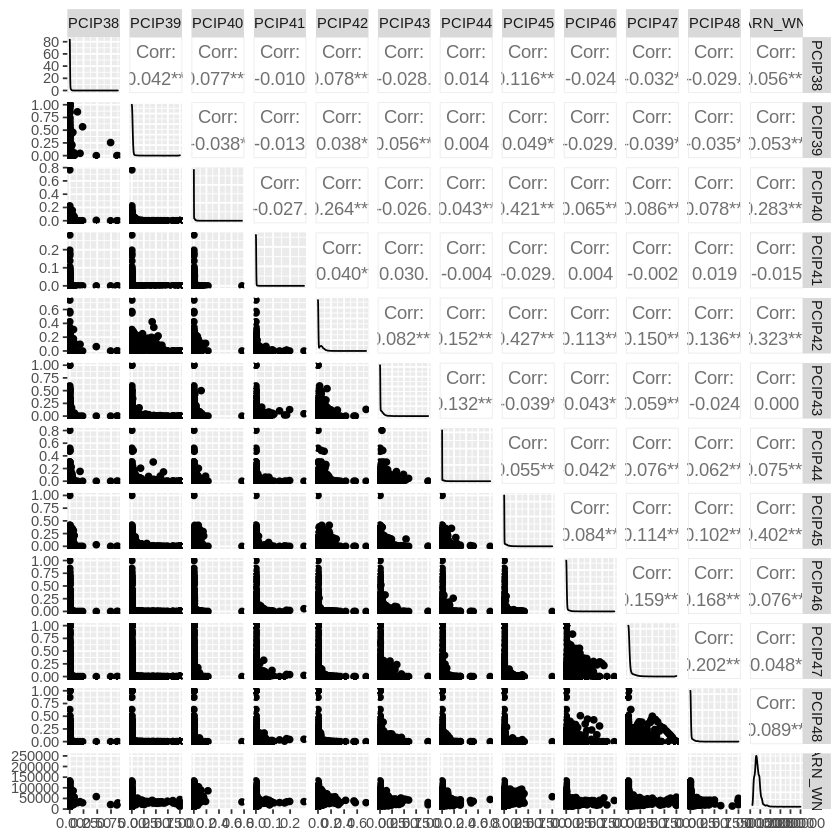

In [ ]:
ggpairs(college[,c(38:48, 72)])

From above scatterplot matrix, we can see that no variable has a relatively strong correlation with the target variable.

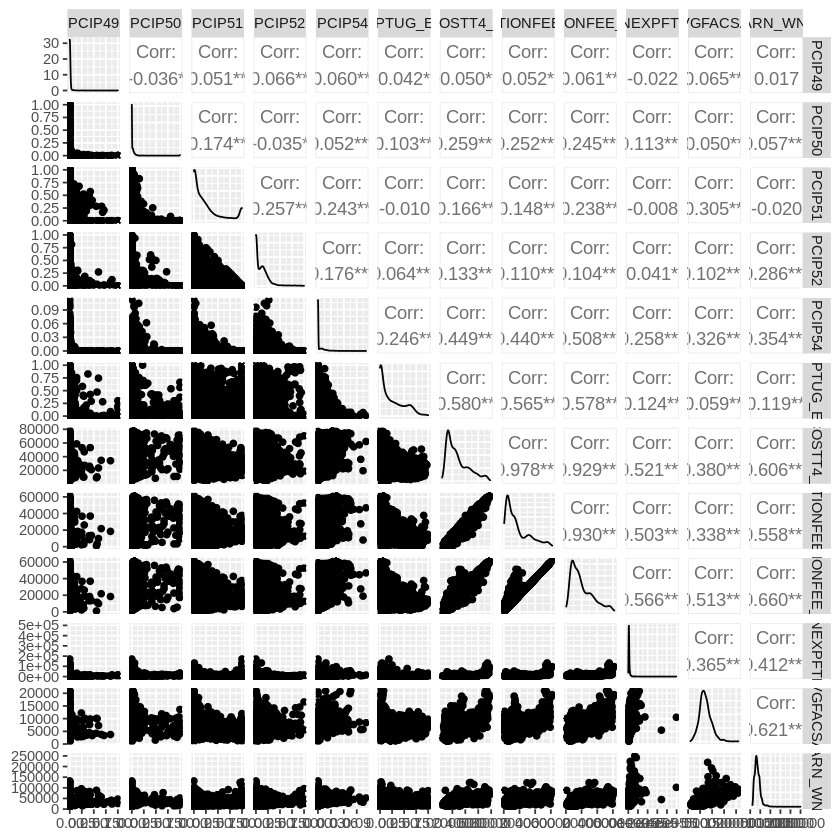

In [ ]:
ggpairs(college[,c(49:59, 72)])

From above scatterplot matrix, we can see that COSTT4_A, TUITIONFEE_IN, TUITIONFEE_OUT, and AVGFACSAL have a relatively strong correlation with the target variable.

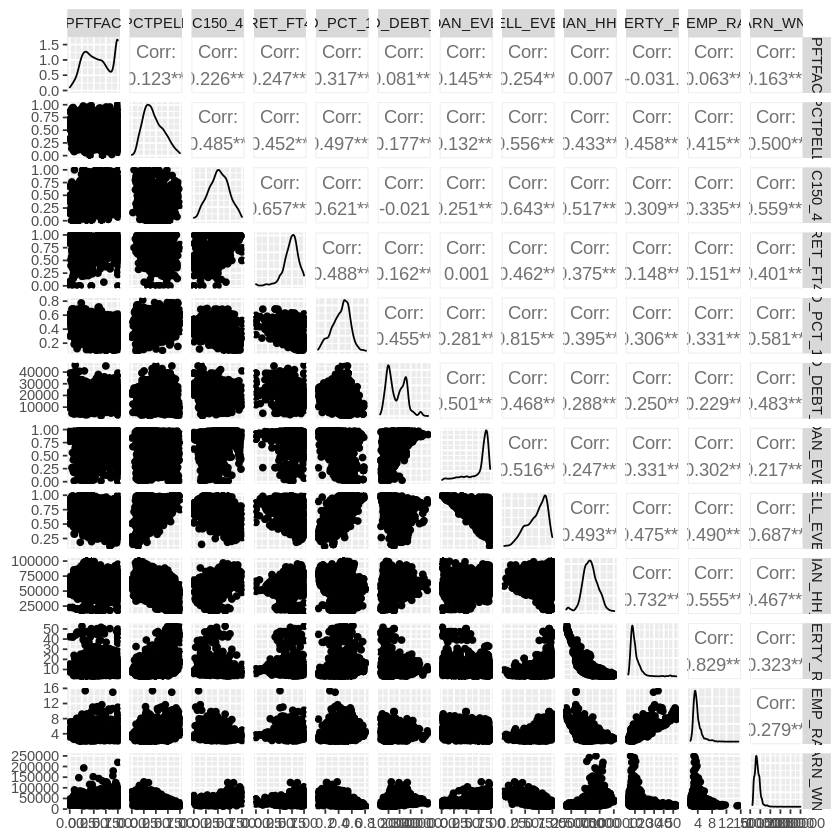

In [ ]:
ggpairs(college[,c(60:70, 72)])

From above scatterplot matrix, we can see that PCTPELL, C150_4, PAR_ED_PCT_1STGEN, and PELL_EVER have a relatively strong correlation with the target variable.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better valu

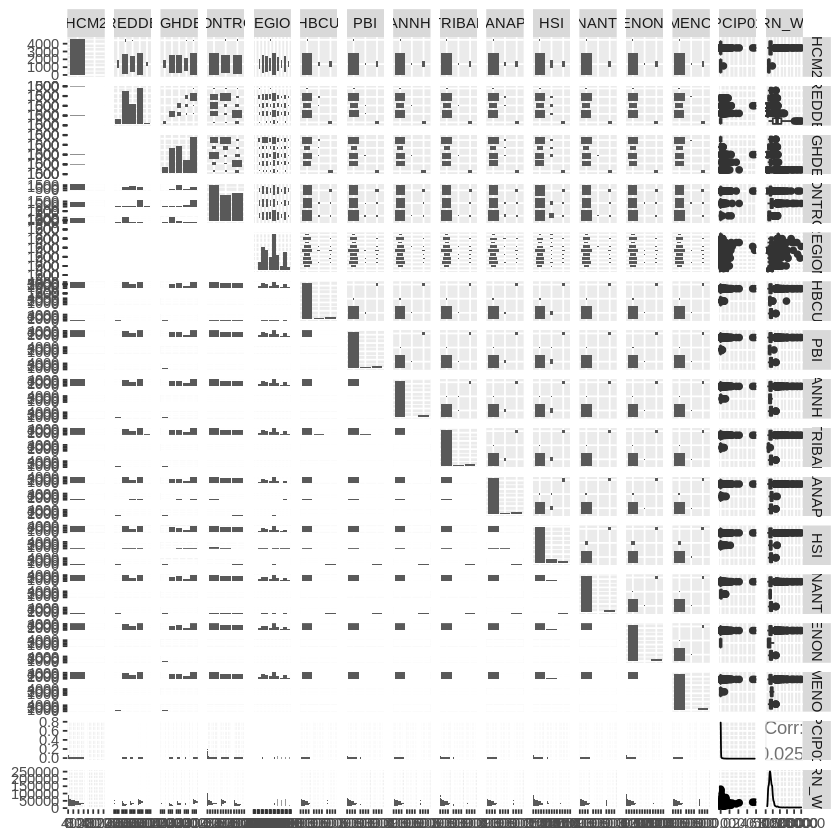

In [ ]:
ggpairs(college[,c(2:16, 72)])

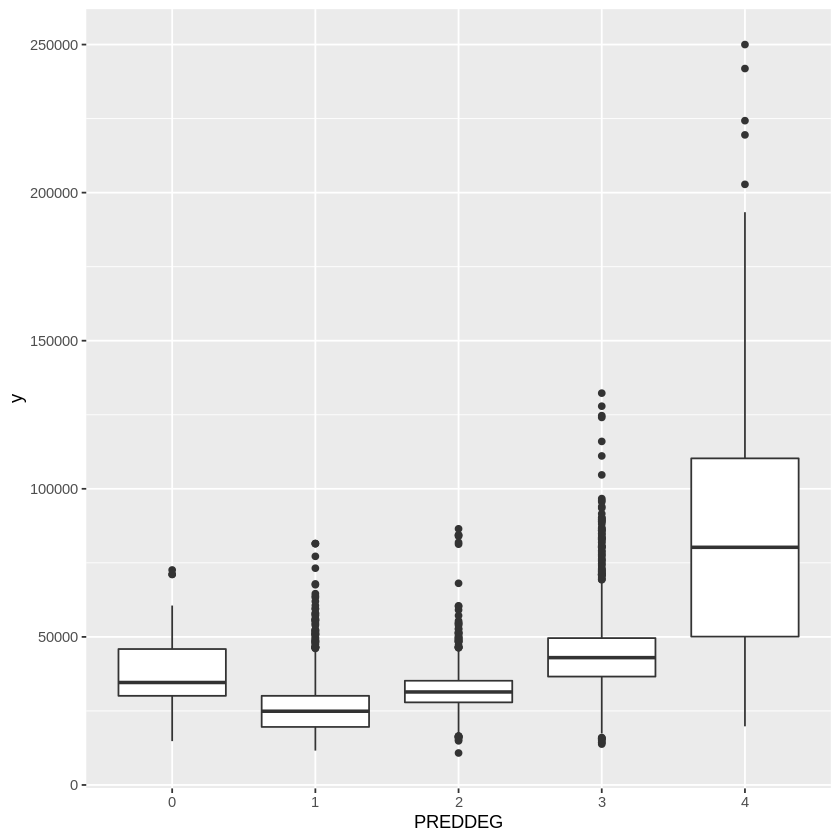

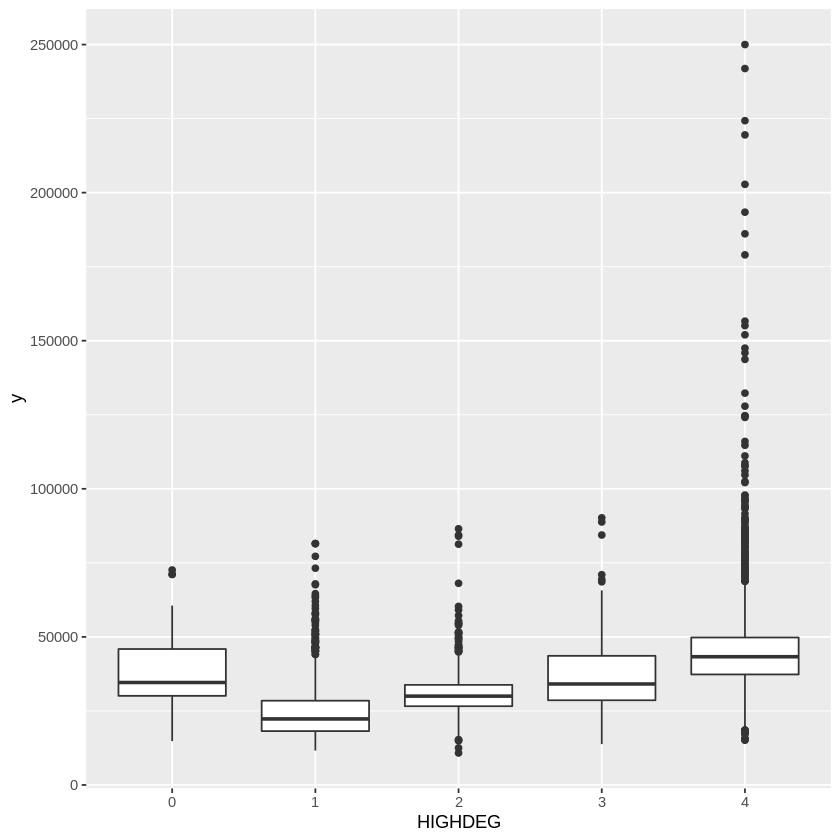

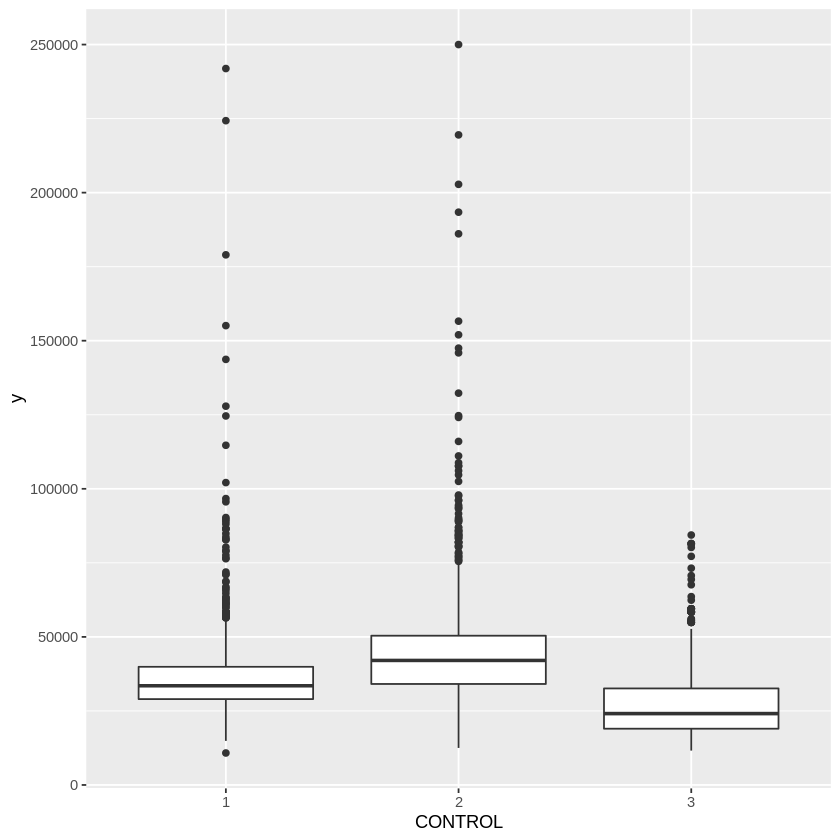

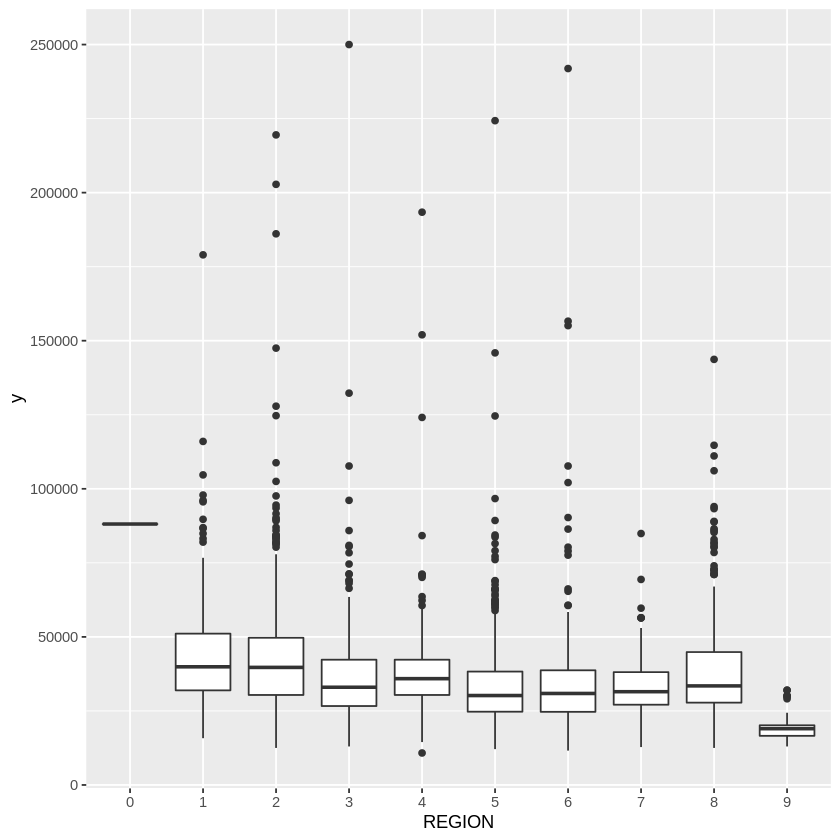

In [ ]:
ggplot(data = college) + geom_boxplot(aes(x = PREDDEG, y = y))
ggplot(data = college) + geom_boxplot(aes(x = HIGHDEG, y = y))
ggplot(data = college) + geom_boxplot(aes(x = CONTROL, y = y))
ggplot(data = college) + geom_boxplot(aes(x = REGION, y = y))

Now, we are experimenting the relationship between the dummy variables and the target variable. From above boxplot matrix, we can see that independent variables such as PREDDEG and HIGHDEG have a relatively signficiant correlation with the target variable. 

In [ ]:
install.packages("leaps")
library(leaps)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
model1 <- regsubsets(y~., data = college[,c(3, 4, 55, 56, 57, 59, 61, 62, 64, 67)], nvmax = 10)
summary(model1)

Subset selection object
Call: regsubsets.formula(y ~ ., data = college[, c(3, 4, 55, 56, 57, 
    59, 61, 62, 64, 67)], nvmax = 10)
12 Variables  (and intercept)
                  Forced in Forced out
PREDDEG2              FALSE      FALSE
PREDDEG3              FALSE      FALSE
HIGHDEG3              FALSE      FALSE
HIGHDEG4              FALSE      FALSE
COSTT4_A              FALSE      FALSE
TUITIONFEE_IN         FALSE      FALSE
TUITIONFEE_OUT        FALSE      FALSE
AVGFACSAL             FALSE      FALSE
PCTPELL               FALSE      FALSE
C150_4                FALSE      FALSE
PAR_ED_PCT_1STGEN     FALSE      FALSE
PELL_EVER             FALSE      FALSE
1 subsets of each size up to 10
Selection Algorithm: exhaustive
          PREDDEG2 PREDDEG3 HIGHDEG3 HIGHDEG4 COSTT4_A TUITIONFEE_IN
1  ( 1 )  " "      " "      " "      " "      " "      " "          
2  ( 1 )  " "      " "      " "      " "      " "      " "          
3  ( 1 )  " "      " "      " "      " "      " "      " "  

In [ ]:
scores = summary(model1)
data.frame(
  Adj.R2 = which.max(scores$adjr2),
  CP = which.min(scores$cp),
  BIC = which.min(scores$bic)
)

Adj.R2,CP,BIC
<int>,<int>,<int>
10,9,5


By running the best subset regression, the model with the highest adjusted R squared value, lowest Mallows's Cp value, and lowest BIC are model 10, model 9, and model 5 respectively. We will choose the model chosen by adjusted R squared as our model since it measures the percentage of variance in the target variable that is explained by the independent variables. Thus, the predictors for our model includes: PREDDEG, COSTT4_A, TUITIONFEE_IN, TUITIONFEE_OUT, AVGFACSAL, PCTPELL, C150_4, PAR_ED_PCT_1STGEN, and PELL_EVER. 

[1] 3

[1] 55

[1] 56

[1] 57

[1] 59

[1] 61

[1] 62

[1] 64

[1] 67

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



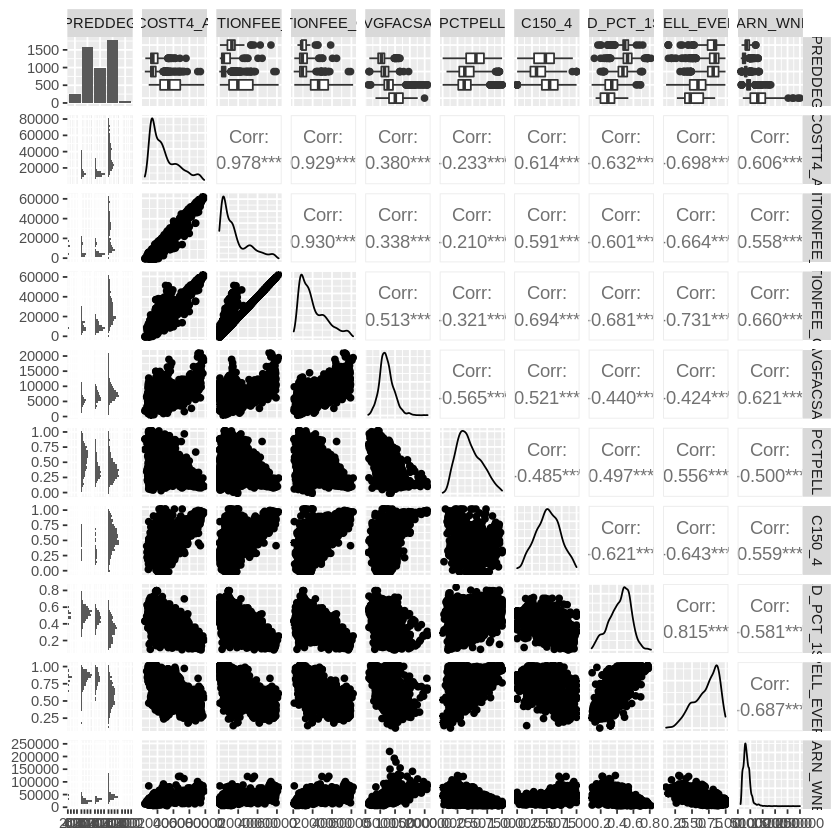

In [ ]:
grep("PREDDEG", colnames(college))
grep("COSTT4_A", colnames(college))
grep("TUITIONFEE_IN", colnames(college))
grep("TUITIONFEE_OUT", colnames(college))
grep("AVGFACSAL", colnames(college))
grep("PCTPELL", colnames(college))
grep("C150_4", colnames(college))
grep("PAR_ED_PCT_1STGEN", colnames(college))
grep("PELL_EVER", colnames(college))
ggpairs(college[,c(3,55,56,57,59,61,62,64,67, 72)])

Since TUITIONFEE_IN and TUITIONFEE_OUT have strong correlation, we drop them from our model. 

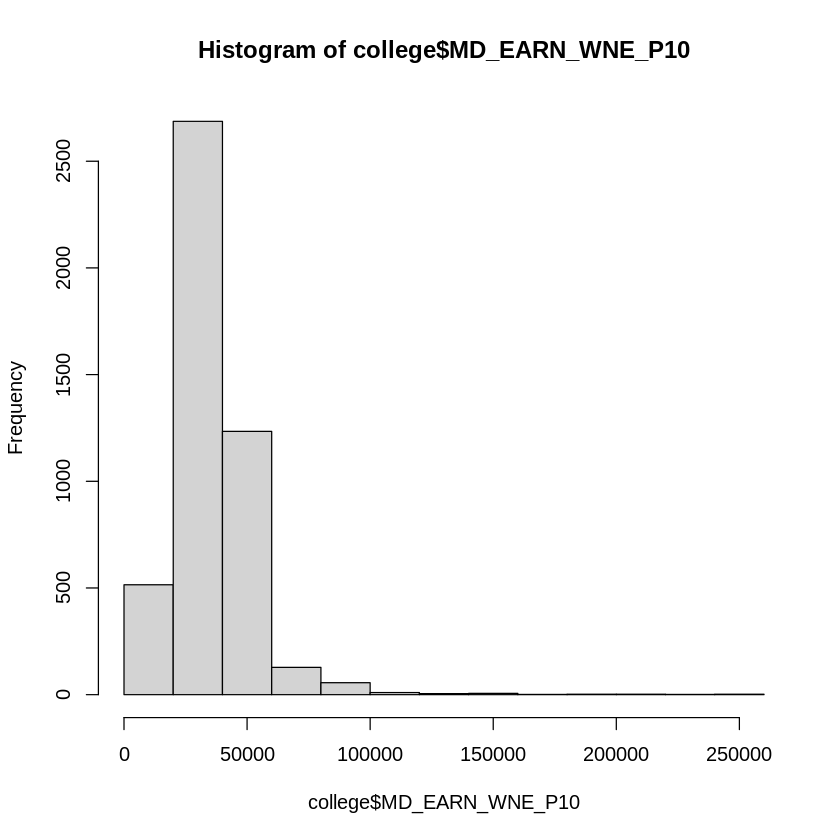

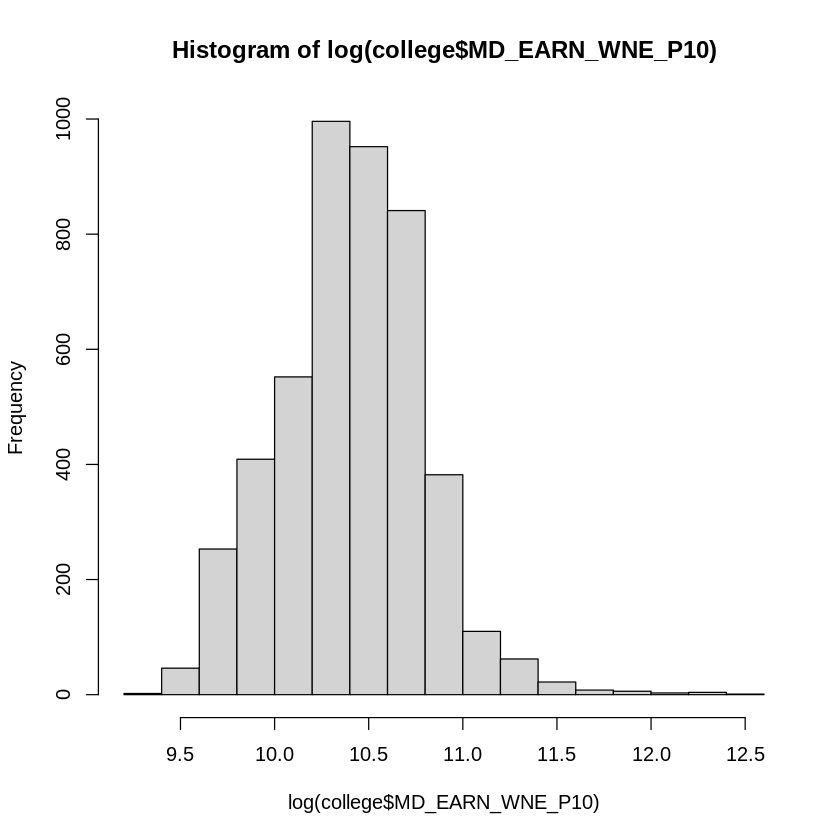

In [ ]:
hist(college$MD_EARN_WNE_P10) 
hist(log(college$MD_EARN_WNE_P10))

From the first graph, we can see that the dependent variable "MD_EARN_WNE_P10" is right-skewed. After applying log transform (all the values must be positive), the shape is more ideal.

In [ ]:
model2 = lm(log(y) ~ PREDDEG + COSTT4_A + AVGFACSAL + PCTPELL+ C150_4 + PAR_ED_PCT_1STGEN + PELL_EVER, data = college)
summary(model2)


Call:
lm(formula = log(y) ~ PREDDEG + COSTT4_A + AVGFACSAL + PCTPELL + 
    C150_4 + PAR_ED_PCT_1STGEN + PELL_EVER, data = college)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.60074 -0.08024 -0.00751  0.07937  0.97513 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        1.029e+01  3.833e-02 268.405  < 2e-16 ***
PREDDEG2           7.192e-02  2.162e-02   3.326 0.000899 ***
PREDDEG3           1.336e-01  2.075e-02   6.439 1.52e-10 ***
COSTT4_A           1.756e-06  2.807e-07   6.257 4.85e-10 ***
AVGFACSAL          4.962e-05  1.714e-06  28.943  < 2e-16 ***
PCTPELL           -2.177e-01  3.022e-02  -7.206 8.36e-13 ***
C150_4             9.203e-02  2.562e-02   3.593 0.000336 ***
PAR_ED_PCT_1STGEN  8.116e-01  5.049e-02  16.076  < 2e-16 ***
PELL_EVER         -7.833e-01  3.922e-02 -19.972  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1431 on 1856 degrees of freedom
  (2784 obs

We can see from the summary table that all the $β$ coefficients have low p values, so that we reject all the nulls and all of them are significant in our model. Now, we need to check whether this model meets the "LINE" conditions or not. 

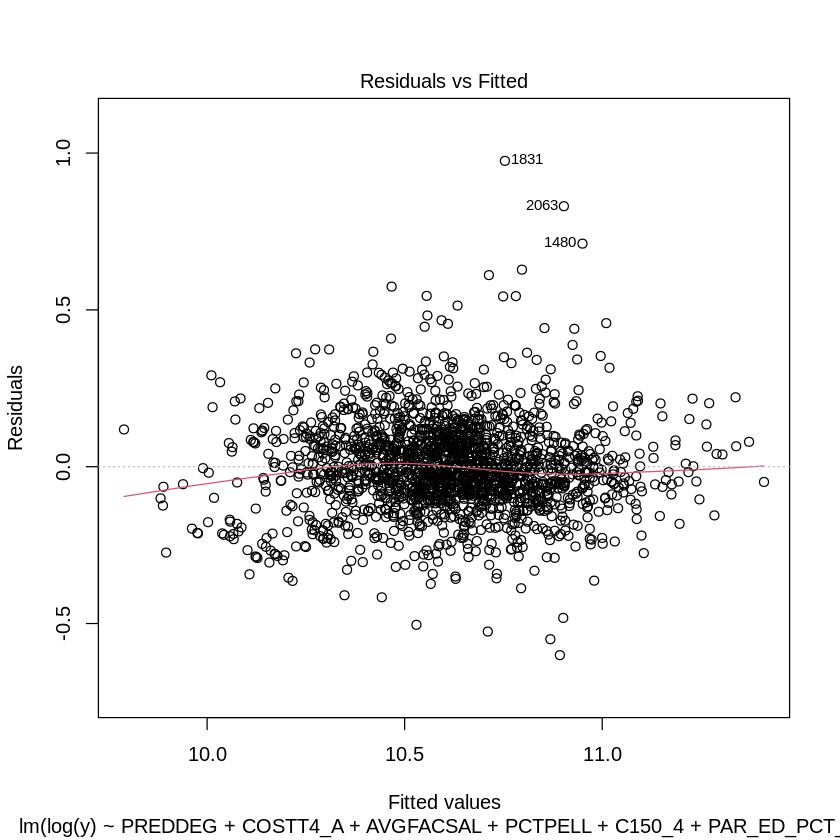

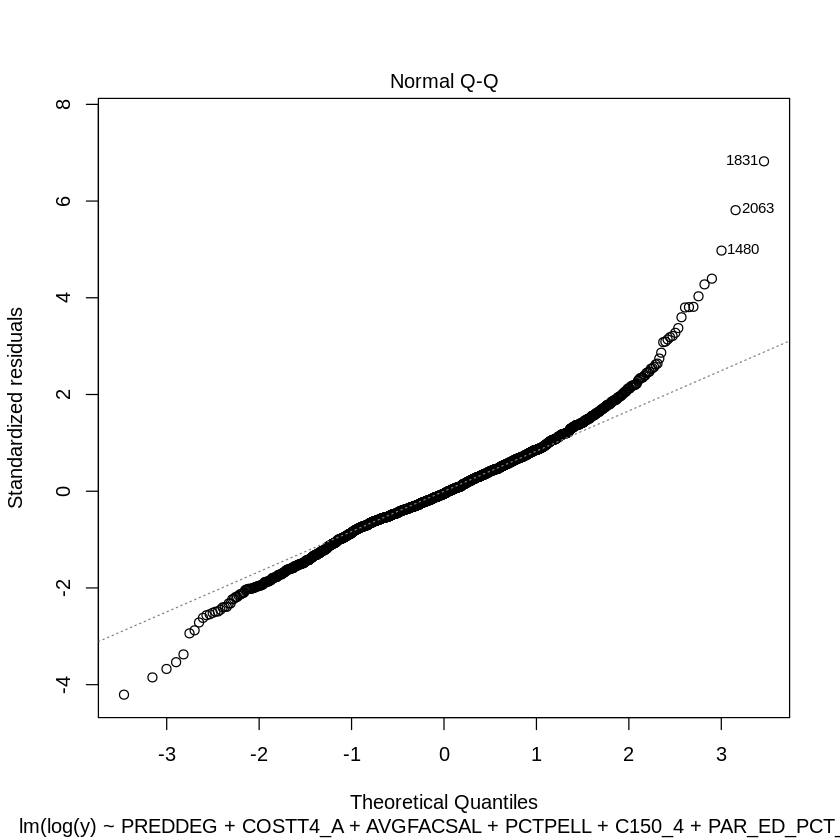

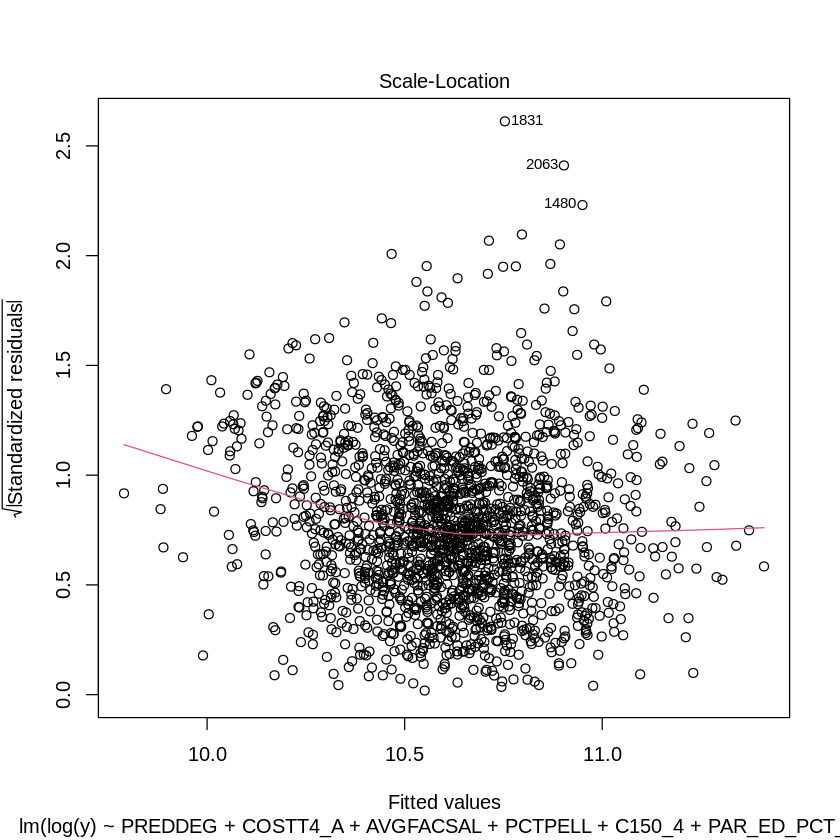

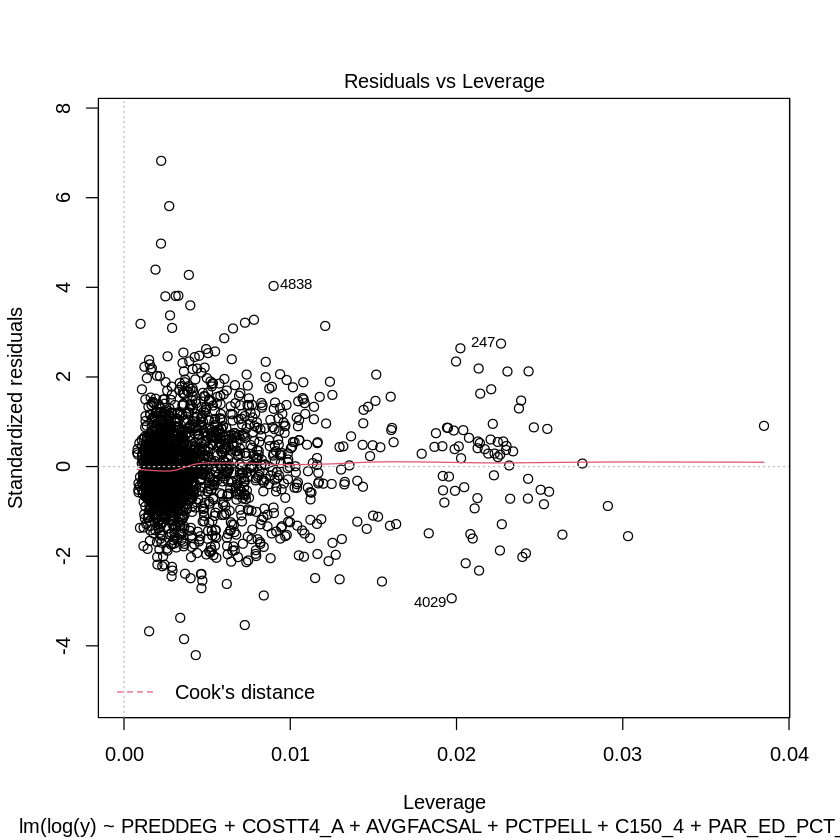

In [ ]:
plot(model2)

From the residuals vs fitted values and standardized residuals vs fitted values graphs, we can see that these graphs are "well-behaved" because data points randomly bounce around. Moreover, from the residuals vs fitted values graph, we don't observe any drastic outliers. From the normal Q-Q plot, we can see that the residuals are approximately normally distributed as well. From the residuals vs leverage graph, we can see that there are no concerning influential points that need to be addressed (all cases are well inside of the Cook’s distance lines).


Call:
lm(formula = log(y) ~ PREDDEG + COSTT4_A + AVGFACSAL + PCTPELL + 
    C150_4 + PAR_ED_PCT_1STGEN + PELL_EVER, data = college)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.60074 -0.08024 -0.00751  0.07937  0.97513 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        1.029e+01  3.833e-02 268.405  < 2e-16 ***
PREDDEG2           7.192e-02  2.162e-02   3.326 0.000899 ***
PREDDEG3           1.336e-01  2.075e-02   6.439 1.52e-10 ***
COSTT4_A           1.756e-06  2.807e-07   6.257 4.85e-10 ***
AVGFACSAL          4.962e-05  1.714e-06  28.943  < 2e-16 ***
PCTPELL           -2.177e-01  3.022e-02  -7.206 8.36e-13 ***
C150_4             9.203e-02  2.562e-02   3.593 0.000336 ***
PAR_ED_PCT_1STGEN  8.116e-01  5.049e-02  16.076  < 2e-16 ***
PELL_EVER         -7.833e-01  3.922e-02 -19.972  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1431 on 1856 degrees of freedom
  (2784 obs

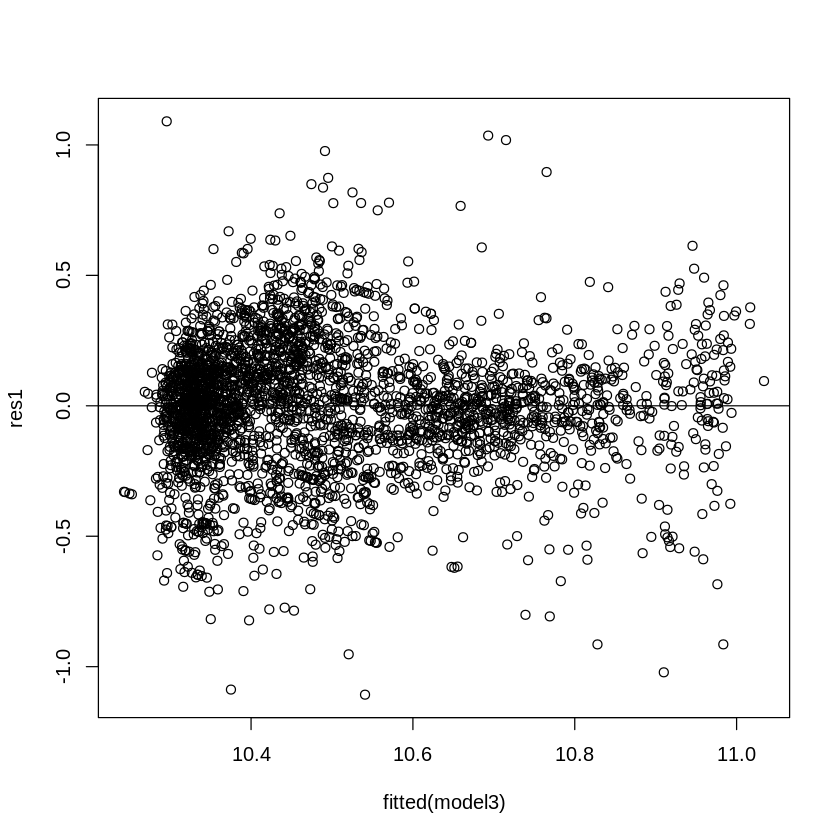

In [ ]:
model3 = lm(log(y) ~ COSTT4_A, data = college)
summary(model2)
res1 = resid(model3)
plot(fitted(model3), res1)
abline(0, 0)


Call:
lm(formula = log(y) ~ AVGFACSAL, data = college)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.17234 -0.15149 -0.00558  0.13963  1.70926 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 9.887e+00  1.295e-02  763.52   <2e-16 ***
AVGFACSAL   8.616e-05  1.694e-06   50.87   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2439 on 3261 degrees of freedom
  (1386 observations deleted due to missingness)
Multiple R-squared:  0.4424,	Adjusted R-squared:  0.4423 
F-statistic:  2588 on 1 and 3261 DF,  p-value: < 2.2e-16


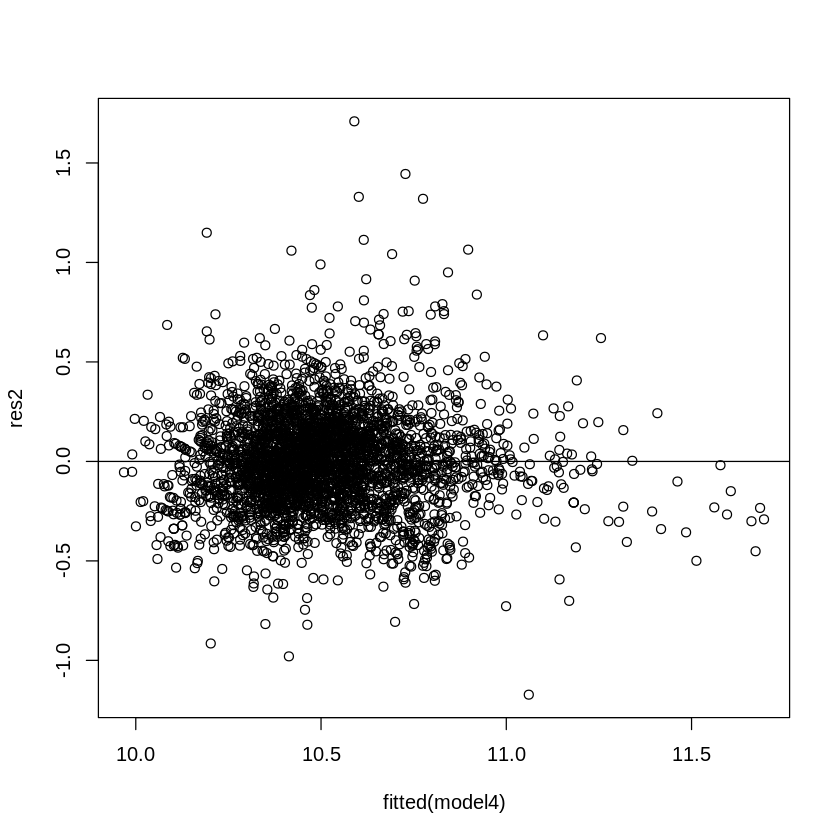

In [ ]:
model4 = lm(log(y) ~ AVGFACSAL, data = college)
summary(model4)
res2 = resid(model4)
plot(fitted(model4), res2)
abline(0, 0)


Call:
lm(formula = log(y) ~ PCTPELL, data = college)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.16545 -0.20849  0.01447  0.21310  1.23748 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 10.82573    0.01152  939.69   <2e-16 ***
PCTPELL     -0.96525    0.02336  -41.32   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3117 on 4312 degrees of freedom
  (335 observations deleted due to missingness)
Multiple R-squared:  0.2837,	Adjusted R-squared:  0.2835 
F-statistic:  1708 on 1 and 4312 DF,  p-value: < 2.2e-16


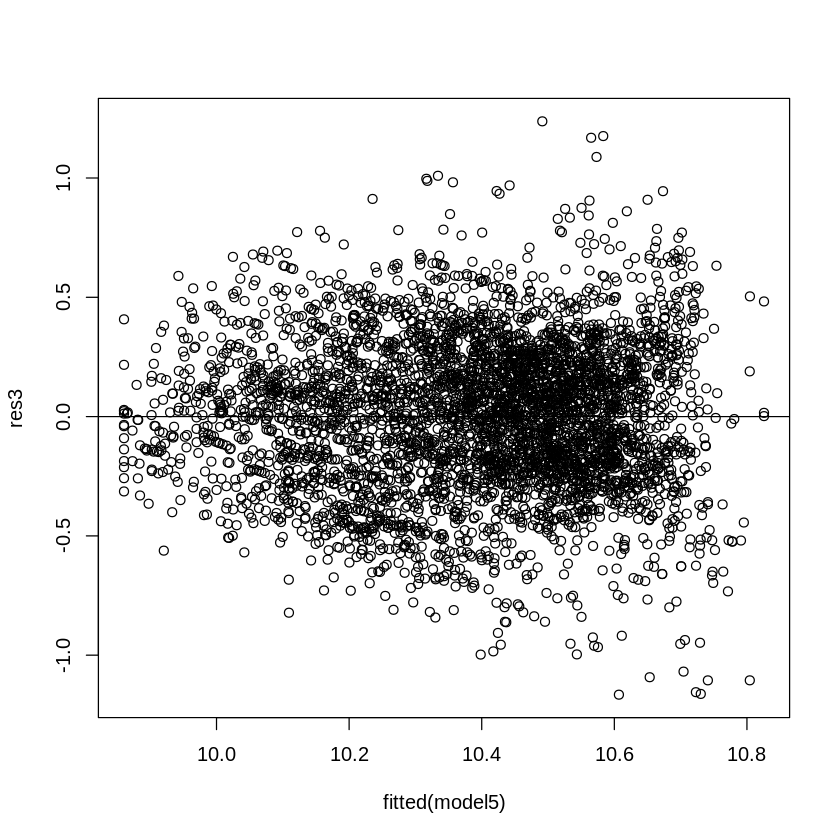

In [ ]:
model5 = lm(log(y) ~ PCTPELL, data = college)
summary(model5)
res3 = resid(model5)
plot(fitted(model5), res3)
abline(0, 0)


Call:
lm(formula = log(y) ~ C150_4, data = college)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.2178 -0.1073  0.0224  0.1343  1.0003 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 10.20375    0.01479  690.08   <2e-16 ***
C150_4       0.75267    0.02647   28.43   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.249 on 2037 degrees of freedom
  (2610 observations deleted due to missingness)
Multiple R-squared:  0.2841,	Adjusted R-squared:  0.2837 
F-statistic: 808.3 on 1 and 2037 DF,  p-value: < 2.2e-16


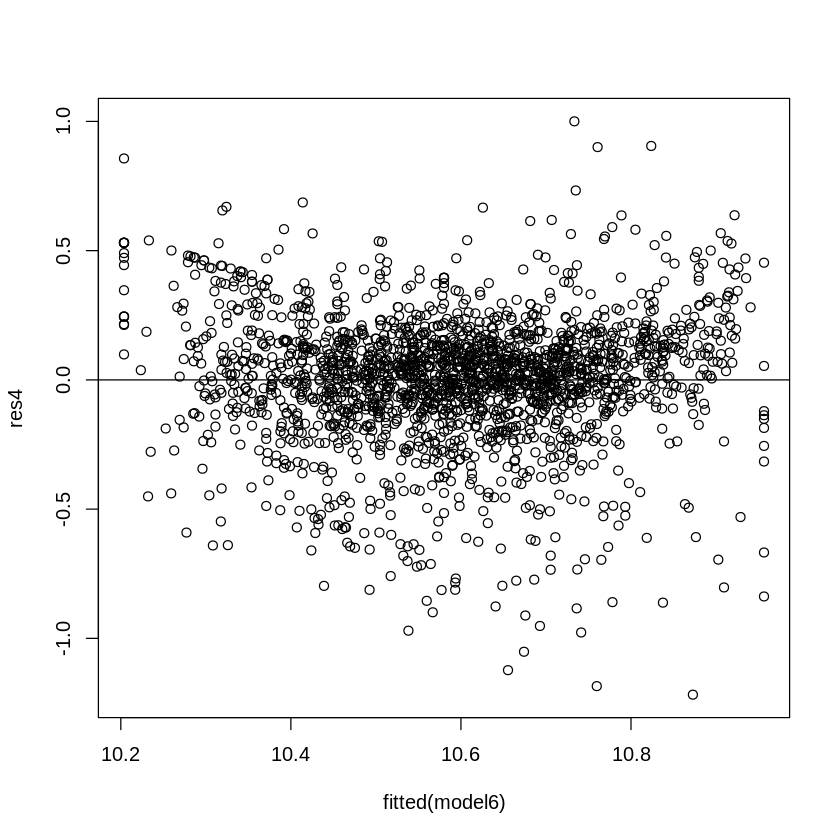

In [ ]:
model6 = lm(log(y) ~ C150_4, data = college)
summary(model6)
res4 = resid(model6)
plot(fitted(model6), res4)
abline(0, 0)


Call:
lm(formula = log(y) ~ PAR_ED_PCT_1STGEN, data = college)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.34117 -0.15599  0.01032  0.17080  1.26078 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)       11.11973    0.01558  713.91   <2e-16 ***
PAR_ED_PCT_1STGEN -1.63923    0.03427  -47.84   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2911 on 4402 degrees of freedom
  (245 observations deleted due to missingness)
Multiple R-squared:  0.3421,	Adjusted R-squared:  0.3419 
F-statistic:  2288 on 1 and 4402 DF,  p-value: < 2.2e-16


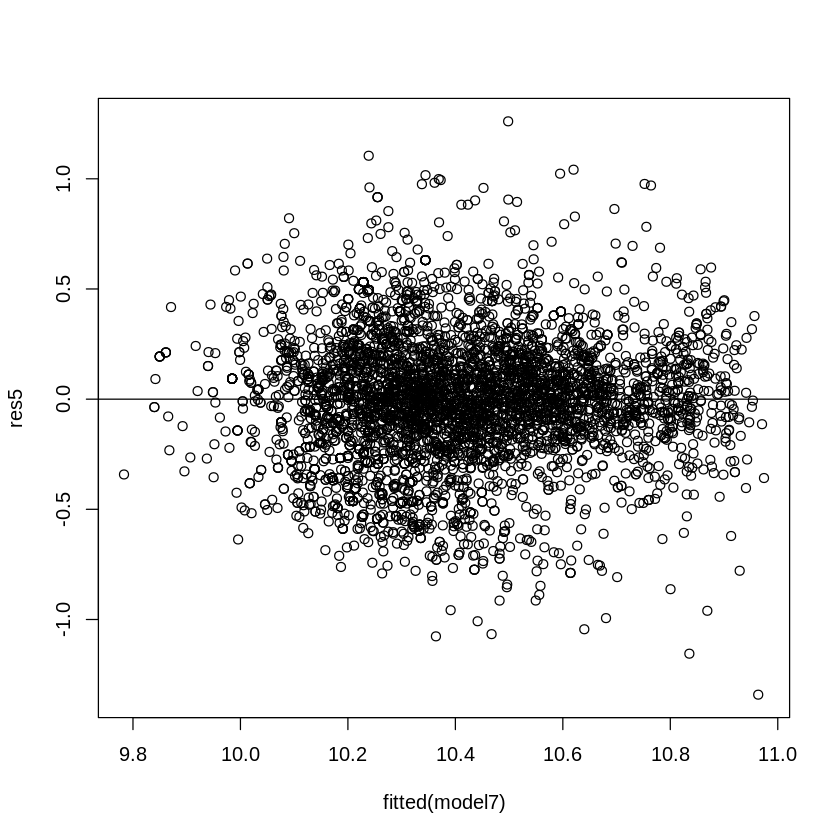

In [ ]:
model7 = lm(log(y) ~ PAR_ED_PCT_1STGEN, data = college)
summary(model7)
res5 = resid(model7)
plot(fitted(model7), res5)
abline(0, 0)


Call:
lm(formula = log(y) ~ PELL_EVER, data = college)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.02554 -0.12861  0.00847  0.13991  0.93754 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 11.38107    0.01628  699.05   <2e-16 ***
PELL_EVER   -1.31101    0.02215  -59.18   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2541 on 4099 degrees of freedom
  (548 observations deleted due to missingness)
Multiple R-squared:  0.4607,	Adjusted R-squared:  0.4606 
F-statistic:  3502 on 1 and 4099 DF,  p-value: < 2.2e-16


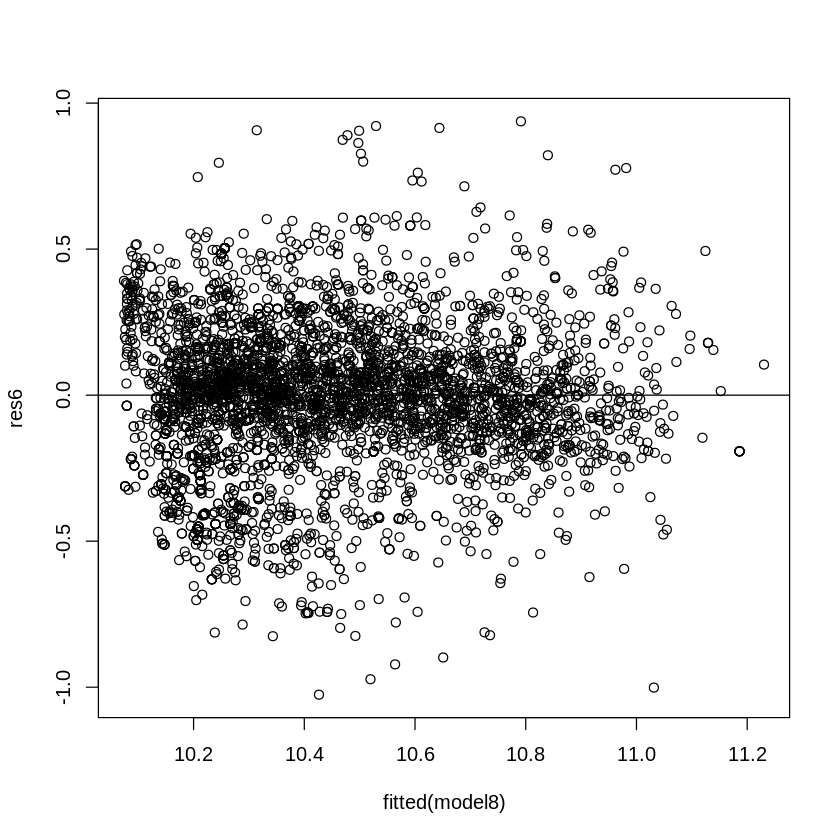

In [ ]:
model8 = lm(log(y) ~ PELL_EVER, data = college)
summary(model8)
res6 = resid(model8)
plot(fitted(model8), res6)
abline(0, 0)

After plotting the residuals vs fitted values plot for each independent variable, I suspect that we should include PAR_ED_PCT_1STGEN squared term in our model since there seems to be a parabola trend in the residuals vs fitted values plot. 

In [ ]:
model9 = lm(log(y) ~ PREDDEG + COSTT4_A + AVGFACSAL + PCTPELL+ C150_4 + PELL_EVER + PAR_ED_PCT_1STGEN + I(PAR_ED_PCT_1STGEN^2), data = college)
summary(model9)


Call:
lm(formula = log(y) ~ PREDDEG + COSTT4_A + AVGFACSAL + PCTPELL + 
    C150_4 + PELL_EVER + PAR_ED_PCT_1STGEN + I(PAR_ED_PCT_1STGEN^2), 
    data = college)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.59059 -0.08125 -0.00733  0.07921  0.97500 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)             1.025e+01  4.790e-02 213.913  < 2e-16 ***
PREDDEG2                6.931e-02  2.168e-02   3.197 0.001414 ** 
PREDDEG3                1.273e-01  2.114e-02   6.023 2.06e-09 ***
COSTT4_A                1.848e-06  2.870e-07   6.440 1.52e-10 ***
AVGFACSAL               4.987e-05  1.721e-06  28.968  < 2e-16 ***
PCTPELL                -2.146e-01  3.027e-02  -7.090 1.90e-12 ***
C150_4                  9.722e-02  2.583e-02   3.763 0.000173 ***
PELL_EVER              -7.814e-01  3.923e-02 -19.920  < 2e-16 ***
PAR_ED_PCT_1STGEN       1.056e+00  1.679e-01   6.287 4.03e-10 ***
I(PAR_ED_PCT_1STGEN^2) -3.407e-01  2.236e-01  -1.524 0.127

After running the model, it turns out to be not significant, so we will go with the original model.

In [ ]:
model10 = lm(log(y) ~ PREDDEG + COSTT4_A + AVGFACSAL + PCTPELL+ C150_4 + PAR_ED_PCT_1STGEN + PELL_EVER, data = college)
model11 = lm(log(y) ~ PREDDEG + COSTT4_A + AVGFACSAL + PCTPELL+ C150_4 + PAR_ED_PCT_1STGEN + PELL_EVER + PREDDEG*PELL_EVER, data = college)
anova(model10, model11)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1856,38.01013,NA,NA,NA,NA
2,1854,37.34698,2,0.6631578,16.46043,8.204508e-08


After finishing construct model10, we suspect that PREDDEG and PELL_EVER might have an interaction effect, so that we conduct ANOVA to figure it out. The p value for the coefficient of the interaction term is really small so that we will go with the model with the interaction term. 

So the final regression model is:

$log(y) = {β_{0}} \: + {β_{1}} \:*\: PREDDEG2 \:+\: {β_{2}} \:*\: PREDDEG3 \:+ {β_{3}} \:*\: COSTT4\_A \: + \: {β_{4}} \:*\: AVGFACSAL \: + \:{β_{5}} \:*\: PCTPELL \: + \: {β_{6}} \:*\: C150\_4 \:+\: {β_{7}} \:*\: PAR\_ED\_PCT\_1STGEN \: + \: {β_{8}} \:*\: PELL\_EVER \:+\: {β_{9}} \:*\: PREDDEG2:PELL\_EVER \:+\: {β_{10}} \:*\: PREDDEG3:PELL\_EVER$

In [ ]:
summary(model11)


Call:
lm(formula = log(y) ~ PREDDEG + COSTT4_A + AVGFACSAL + PCTPELL + 
    C150_4 + PAR_ED_PCT_1STGEN + PELL_EVER + PREDDEG * PELL_EVER, 
    data = college)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.59511 -0.08107 -0.00677  0.07762  0.98094 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)         1.017e+01  1.357e-01  74.987  < 2e-16 ***
PREDDEG2            4.343e-01  1.438e-01   3.021 0.002558 ** 
PREDDEG3            1.986e-01  1.358e-01   1.462 0.143987    
COSTT4_A            1.972e-06  2.810e-07   7.016 3.19e-12 ***
AVGFACSAL           4.908e-05  1.704e-06  28.806  < 2e-16 ***
PCTPELL            -2.548e-01  3.070e-02  -8.299  < 2e-16 ***
C150_4              1.064e-01  2.567e-02   4.145 3.55e-05 ***
PAR_ED_PCT_1STGEN   8.097e-01  5.017e-02  16.140  < 2e-16 ***
PELL_EVER          -6.306e-01  1.648e-01  -3.826 0.000135 ***
PREDDEG2:PELL_EVER -4.552e-01  1.736e-01  -2.622 0.008803 ** 
PREDDEG3:PELL_EVER -6.142e-02  1.639e-0

From the summary table, we can see that our final model achieves an adjusted R-squared around 0.7306. 

# Summary

The model we select to predict log(median earnings of students working and not enrolled 10 years after entry) is as follow:

$log(y) = {β_{0}} \: + {β_{1}} \:*\: PREDDEG2 \:+\: {β_{2}} \:*\: PREDDEG3 \:+ {β_{3}} \:*\: COSTT4\_A \: + \: {β_{4}} \:*\: AVGFACSAL \: + \:{β_{5}} \:*\: PCTPELL \: + \: {β_{6}} \:*\: C150\_4 \:+\: {β_{7}} \:*\: PAR\_ED\_PCT\_1STGEN \: + \: {β_{8}} \:*\: PELL\_EVER \:+\: {β_{9}} \:*\: PREDDEG2:PELL\_EVER \:+\: {β_{10}} \:*\: PREDDEG3:PELL\_EVER$


${β_{1}, \:β_{2}, \:β_{9},\:}$ and ${\:β_{10}}$ all are coefficients for the dummy variable one-hot encoded bases on the independent variable "PREDDEG". Moreover, $β_{9}$ and $\:β_{10}$ show the interaction effect between categorical variable "PREDDEG" and continuous variable "PELL_EVER". If you have an associate's degree (PREDDEG2 = 1), your earning will increase by around 54% ($e^{0.4343} - 1$). If you have an bachelor's degree (PREDDEG3 = 1), your earning will increase by around 22% ($e^{0.1986} - 1$). When you have an associate's degree and share of students who received a Pell Grant while in school(PELL_EVER) increase by 1 unit, the earning will decrease by 57% ($e^{0.4343} - 1$). When you have an bachelor's degree and share of students who received a Pell Grant while in school(PELL_EVER) increase by 1 unit, the earning will decrease by 6% ($e^{0.06142} - 1$). 


${β_{3}, \:β_{4}, \:β_{6},\:}$ and ${\:β_{7}}$ for "COSTT4_A", "AVGFACSAL", "C150_4 ", and "PAR_ED_PCT_1STGEN" all have positive coefficients, which means that increase the independent variable by 1 unit will increase the dependent variable. $β_{5}$ and $\:β_{8}$ for "PCTPELL" and "PELL_EVER" have negative coefficients, which means that increase the independent varibale by 1 unit will decrease the dependent variable.

After implementing this model, approximately 73% of the variance in the median earnings (target variable) can be explained by the independent variables of our choice. 